In [1]:
df <- readr::read_csv('hotels.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  hotel = col_character(),
  arrival_date_month = col_character(),
  meal = col_character(),
  country = col_character(),
  market_segment = col_character(),
  distribution_channel = col_character(),
  reserved_room_type = col_character(),
  assigned_room_type = col_character(),
  deposit_type = col_character(),
  agent = col_character(),
  company = col_character(),
  customer_type = col_character(),
  reservation_status = col_character(),
  reservation_status_date = col_date(format = "")
)

See spec(...) for full column specifications.



In [2]:
head(df)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<date>
Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


In [99]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggrepel)
library(stringr)

In [56]:
pltdf <- df %>% 
    group_by(arrival_date_year , hotel , is_canceled) %>% 
    summarise(count = n()) %>% 
    mutate(ratio=round((count/sum(count)),digits= 2) ) 
 

`summarise()` regrouping output by 'arrival_date_year', 'hotel' (override with `.groups` argument)



arrival_date_year,hotel,is_canceled,count,ratio
<dbl>,<chr>,<dbl>,<int>,<dbl>
2015,City Hotel,0,7678,0.56
2015,City Hotel,1,6004,0.44
2015,Resort Hotel,0,6176,0.74
2015,Resort Hotel,1,2138,0.26
2016,City Hotel,0,22733,0.60
2016,City Hotel,1,15407,0.40
2016,Resort Hotel,0,13637,0.73
2016,Resort Hotel,1,4930,0.27
2017,City Hotel,0,15817,0.57


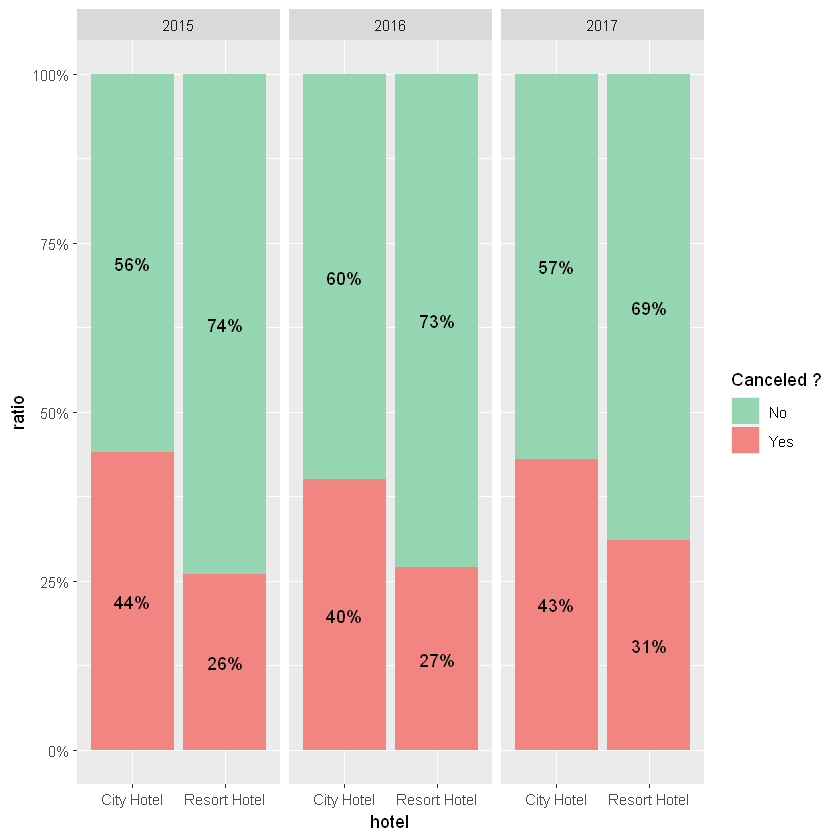

In [86]:
(
    ggplot(pltdf , aes(x=hotel , y=ratio , fill=factor(is_canceled)))
    + geom_col(position=position_fill())
    + facet_wrap(~ arrival_date_year)
    + scale_y_continuous(labels=scales::percent)
    + geom_text(aes(y = ratio, label = scales::percent(ratio , accuracy = 1)),
                  position=position_fill(0.5), color = "black")
    + scale_fill_manual(values = c("#95d5b2", "#f28482") , name="Canceled ?" , labels=c("No" , "Yes"))
    #+ theme(legend.title = element_text("Canceled ?"))
)

In [98]:
library(Rtsne)

Warning message:
"package 'Rtsne' was built under R version 4.0.3"


In [138]:
sampleddf <- df %>% select(total_of_special_requests , required_car_parking_spaces , booking_changes ,is_repeated_guest , adults,lead_time , previous_cancellations,days_in_waiting_list , adr , is_canceled)
sampleddf <- sampleddf[!duplicated(sampleddf) , ] %>%  drop_na()
idx <- sample(nrow(sampleddf), 30000)
sampleddf <- sampleddf[idx, ]

In [142]:
library(rpart)
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 4.0.2"


In [149]:
sdf <- df %>% select(total_of_special_requests , required_car_parking_spaces , booking_changes ,is_repeated_guest , adults,lead_time , previous_cancellations,days_in_waiting_list , adr , is_canceled)
sdf$is_canceled <- if_else(sdf$is_canceled == 0, "no", "yes") %>% as.factor()
fit <- rpart(is_canceled ~ ., method="class", data=sdf)

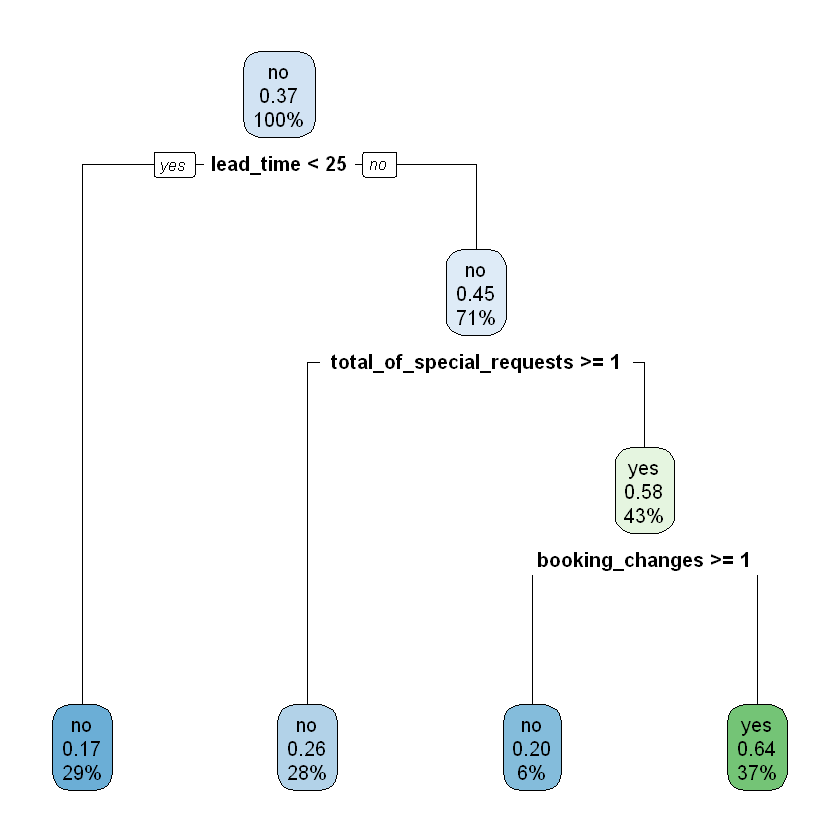

In [150]:
    rpart.plot(fit)

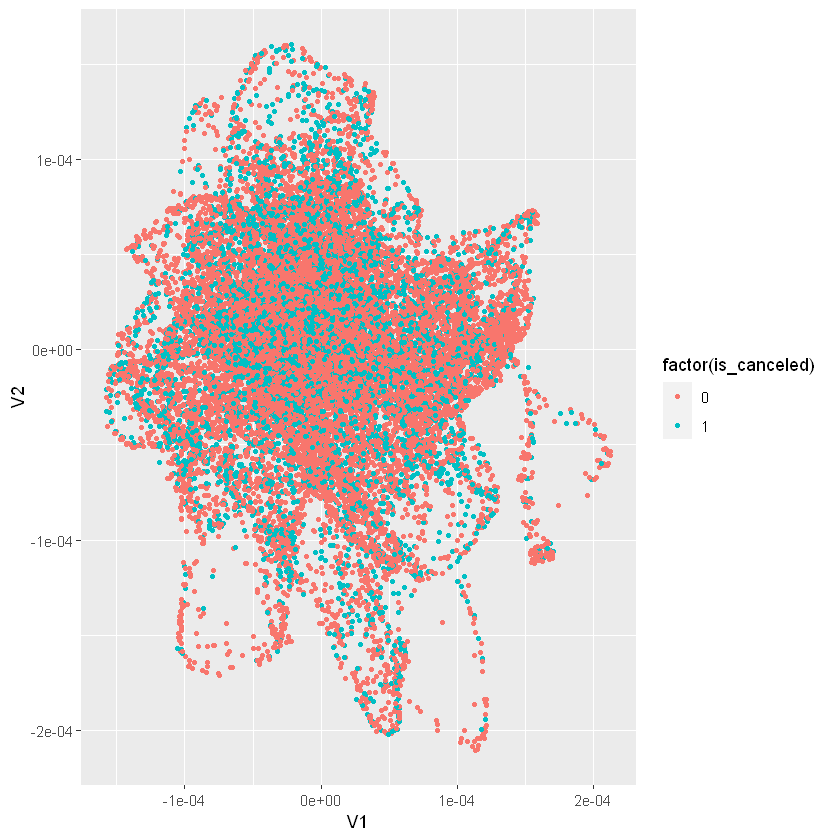

In [137]:
tsnedf <- tsne$Y %>% as.data.frame()
tsnedf$is_canceled <- sampleddf$is_canceled
ggplot(tsnedf, aes(x=V1 , y=V2 , color=factor(is_canceled))) + geom_point(stroke=0)

In [15]:
library(gganimate)
library(gifski)

Warning message:
"package 'gifski' was built under R version 4.0.3"


In [ ]:
(
    ggplot(df , aes(x=booking_changes , y=days_in_waiting_list , fill=factor(is_canceled))) +
    geom_point() + 
    transition_states(arrival_date_year)
)


Rendering [-------------------------------------------] at 0.53 fps ~ eta:  3m

Rendering [>------------------------------------------] at 0.54 fps ~ eta:  3m

Rendering [=>-----------------------------------------] at 0.54 fps ~ eta:  3m

Rendering [==>----------------------------------------] at 0.54 fps ~ eta:  3m


Warning message:
"Removed 2 rows containing non-finite values (stat_density)."


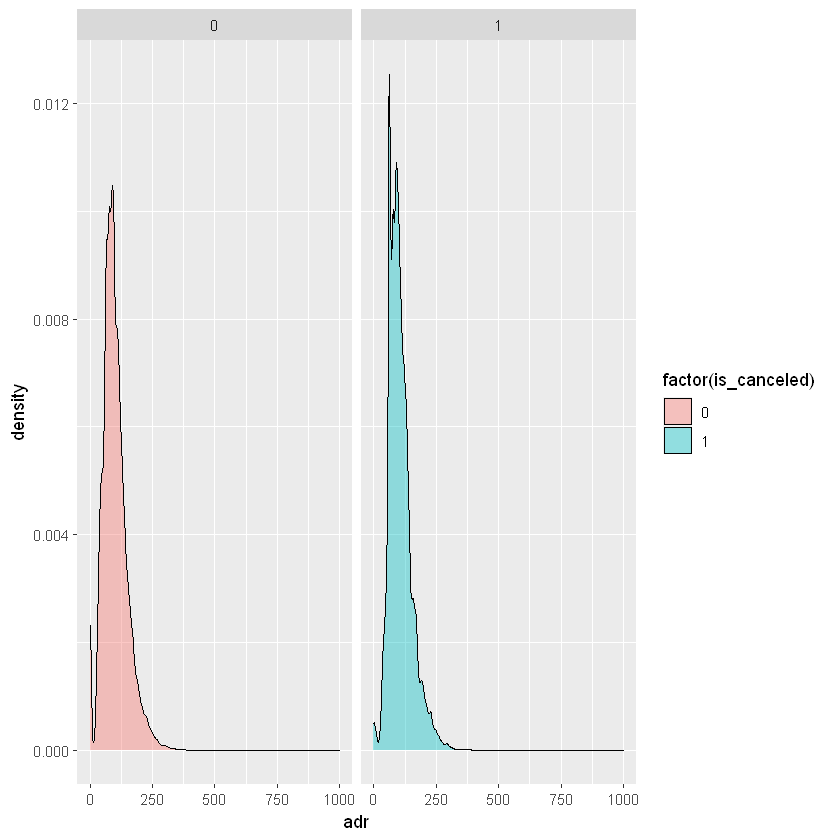

In [29]:
(
    ggplot(df , aes(x=adr , fill=factor(is_canceled))) + 
    geom_density(alpha=0.4) +
    scale_x_continuous(limits=c(0,1000))+
    facet_wrap(~ factor(is_canceled))
)

In [69]:
df %>% select(-one_of(c("company" , "agent"))) %>% colnames()

[1] "hotel"                          "is_canceled"                   
 [3] "lead_time"                      "arrival_date_year"             
 [5] "arrival_date_month"             "arrival_date_week_number"      
 [7] "arrival_date_day_of_month"      "stays_in_weekend_nights"       
 [9] "stays_in_week_nights"           "adults"                        
[11] "children"                       "babies"                        
[13] "meal"                           "country"                       
[15] "market_segment"                 "distribution_channel"          
[17] "is_repeated_guest"              "previous_cancellations"        
[19] "previous_bookings_not_canceled" "reserved_room_type"            
[21] "assigned_room_type"             "booking_changes"               
[23] "deposit_type"                   "days_in_waiting_list"          
[25] "customer_type"                  "adr"                           
[27] "required_car_parking_spaces"    "total_of_special_requests"     
[29] "reservation_status"             "reservation_status_date"

In [64]:
linearmodel <- lm(adr ~ . , df %>% select(-one_of(c("company" , "agent"))))

In [72]:
lm_summary <- summary(linearmodel)

In [73]:
names(lm_summary)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"  "na.action"

In [74]:
coefs <- lm_summary$coefficients %>% as.data.frame() 
colnames(coefs) <- c("estimate" , "stderror" , "tval" , "pval")
coefs <- coefs %>% filter(pval < 0.05)

In [75]:
coefs$variable <- rownames(coefs)
coefs

,estimate,stderror,tval,pval,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-3.470062e+04,1.651449e+03,-21.012226,7.638999e-98,(Intercept)
hotelResort Hotel,-2.432296e+01,2.687913e-01,-90.490143,0.000000e+00,hotelResort Hotel
is_canceled,4.507695e+00,2.960467e-01,15.226298,2.650835e-52,is_canceled
lead_time,-9.727824e-02,1.373426e-03,-70.828915,0.000000e+00,lead_time
arrival_date_year,1.724333e+01,8.370941e-01,20.599036,4.088481e-94,arrival_date_year
arrival_date_monthAugust,5.037383e+01,4.442455e+00,11.339186,8.692811e-30,arrival_date_monthAugust
arrival_date_monthFebruary,-2.947524e+01,2.220804e+00,-13.272327,3.577938e-40,arrival_date_monthFebruary
arrival_date_monthJanuary,-3.525729e+01,3.341732e+00,-10.550607,5.182298e-26,arrival_date_monthJanuary
arrival_date_monthJuly,3.733234e+01,3.319591e+00,11.246068,2.505401e-29,arrival_date_monthJuly


In [115]:
coefs %>% arrange(abs(estimate)) %>% tail(10) %>% filter(variable != "(Intercept)")

,estimate,stderror,tval,pval,variable,x,y,radius
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
assigned_room_typeI,-43.89857,1.799994,-24.388181,4.795944e-131,assigned_room_typeI,NA,NA,NA
assigned_room_typeK,-45.02833,2.040290,-22.069568,1.020347e-107,assigned_room_typeK,NA,NA,NA
reserved_room_typeG,48.27107,1.660658,29.067426,4.130976e-185,reserved_room_typeG,11.9392753,-10.586480,3.919842
arrival_date_monthAugust,50.37383,4.442455,11.339186,8.692811e-30,arrival_date_monthAugust,-1.2948869,-5.201253,4.004309
reserved_room_typeL,50.59023,15.060565,3.359119,7.821600e-04,reserved_room_typeL,0.2110199,16.751420,4.012900
countryAND,58.19891,26.968707,2.158016,3.092854e-02,countryAND,-5.4208377,-12.412786,4.304101
reserved_room_typeH,72.30231,3.082355,23.456842,2.125379e-121,reserved_room_typeH,7.6288866,-18.163414,4.797347
market_segmentComplementary,-89.00841,2.656282,-33.508652,5.021367e-245,market_segmentComplementary,NA,NA,NA
assigned_room_typeL,-135.03949,36.845358,-3.665034,2.474131e-04,assigned_room_typeL,NA,NA,NA


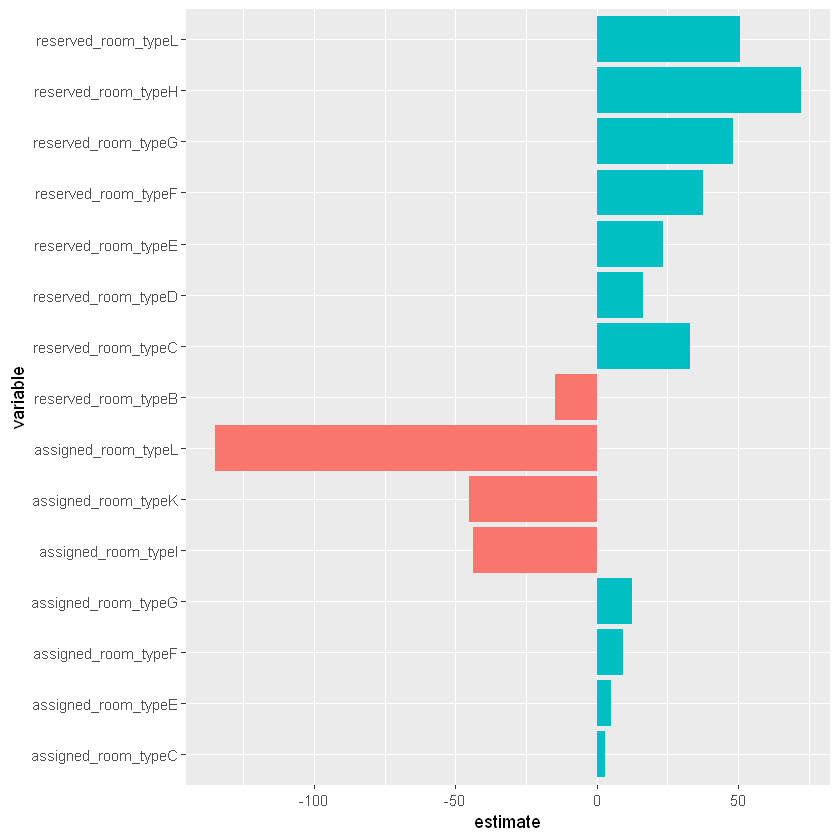

In [92]:
(
    ggplot(coefs %>% filter(grepl("room",variable))
           ,aes(x=variable, y=estimate , fill= estimate > 0)) +
    geom_col() + 
    scale_fill_discrete(guide=F) +
    coord_flip()
)

In [103]:
month_coefs <- coefs %>% filter(grepl("arrival_date_month",variable))
month_coefs$variable <- str_replace(month_coefs$variable , "arrival_date_month" , "")
month_coefs$variable <- month_coefs$variable %>% factor( levels=c("January", "February", "March", "April","May","June","July","August","September","October","November","December")) 
month_coefs

,estimate,stderror,tval,pval,variable,x,y,radius
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
arrival_date_monthAugust,50.37383,4.442455,11.339186,8.692811e-30,August,-1.2948869,-5.2012531,4.004309
arrival_date_monthFebruary,-29.47524,2.220804,-13.272327,3.577938e-40,February,NA,NA,NA
arrival_date_monthJanuary,-35.25729,3.341732,-10.550607,5.182298e-26,January,NA,NA,NA
arrival_date_monthJuly,37.33234,3.319591,11.246068,2.505401e-29,July,-5.7823698,0.7474963,3.447210
arrival_date_monthJune,23.58299,2.269269,10.392330,2.754868e-25,June,-0.6075054,4.1387069,2.739836
arrival_date_monthMarch,-19.28889,1.219305,-15.819574,2.602824e-56,March,NA,NA,NA
arrival_date_monthMay,14.97463,1.188044,12.604437,2.105792e-36,May,4.3151491,4.0736937,2.183248
arrival_date_monthOctober,23.81957,6.665379,3.573626,3.522112e-04,October,7.4331982,0.2462029,2.753544
arrival_date_monthSeptember,38.65349,5.571581,6.937616,4.007961e-12,September,6.1855075,-5.8894418,3.507675


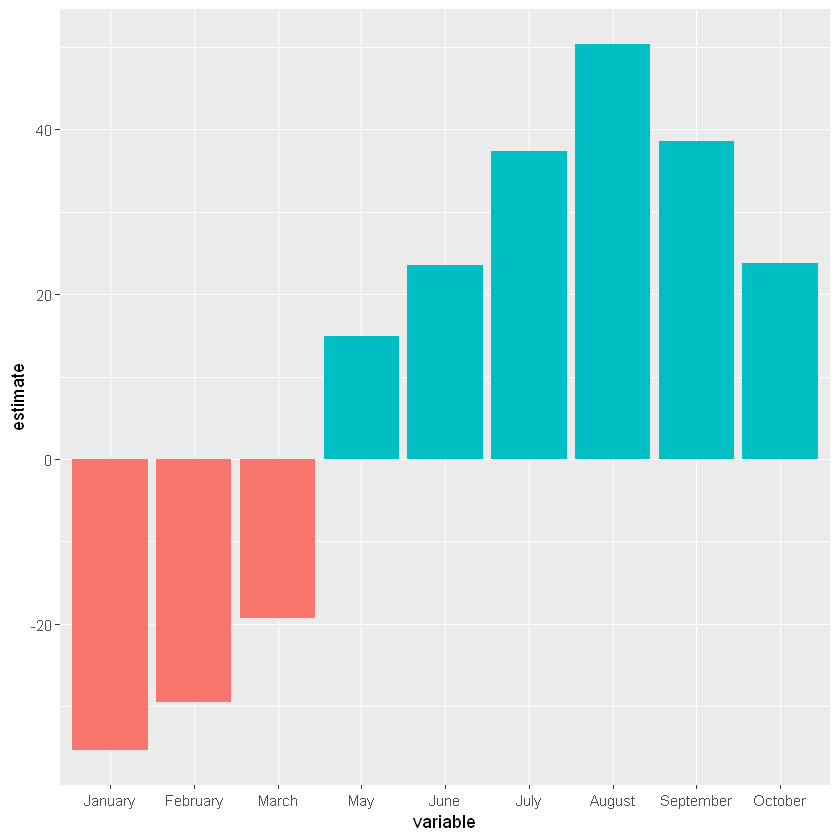

In [105]:
(
    ggplot(month_coefs
           ,aes(x=variable, y=estimate , fill= estimate > 0)) +
    geom_col() + 
    scale_fill_discrete(guide=F) 
)

In [108]:
coefs %>% filter(variable %in% c("adults" , "children","mealFB" , "mealHB" , "mealSC"))

,estimate,stderror,tval,pval,variable,x,y,radius
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
adults,6.639576,0.1861556,35.66681,3.787263e-277,adults,-4.136456,6.404280,1.453768
children,12.528691,0.3277419,38.22731,8.493660e-318,children,-1.620460,8.765966,1.996999
mealFB,43.826682,1.2357103,35.46679,4.343788e-274,mealFB,3.980982,9.982532,3.735032
mealHB,26.931587,0.3253242,82.78383,0.000000e+00,mealHB,-8.516935,6.506329,2.927899
mealSC,-14.881648,0.3875770,-38.39662,1.394253e-320,mealSC,NA,NA,NA


In [76]:
library(packcircles)
library(ggplot2)
library(viridis)
library(ggiraph)

In [84]:
create_packing_plot <- function(df){
        
    packing <- circleProgressiveLayout(df$estimate, sizetype='area')
    coefs <- cbind(df, packing)
    dat.gg <- circleLayoutVertices(packing, npoints=50)
    
    (
        ggplot(df, aes(x=x,  y=y , size=radius)) + 
        geom_point() +
        geom_text(aes(label=variable))
    )
}


Warning message in circleProgressiveLayout(df$estimate, sizetype = "area"):
"missing and/or non-positive sizes will be ignored"
Warning message:
"Removed 4 rows containing missing values (geom_point)."
Warning message:
"Removed 4 rows containing missing values (geom_text)."


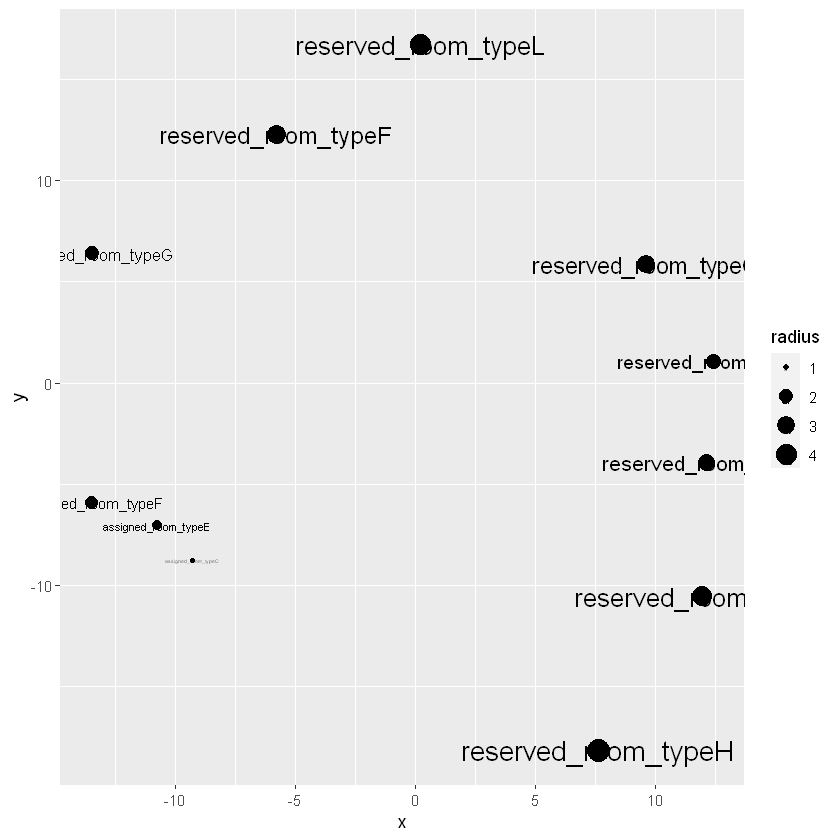

In [85]:
create_packing_plot(coefs %>% filter(grepl("room",variable)))

In [78]:
coefs <- cbind(coefs, packing)
dat.gg <- circleLayoutVertices(packing, npoints=50)

Warning message:
"Removed 20 rows containing missing values (geom_point)."
Warning message:
"Removed 20 rows containing missing values (geom_text)."


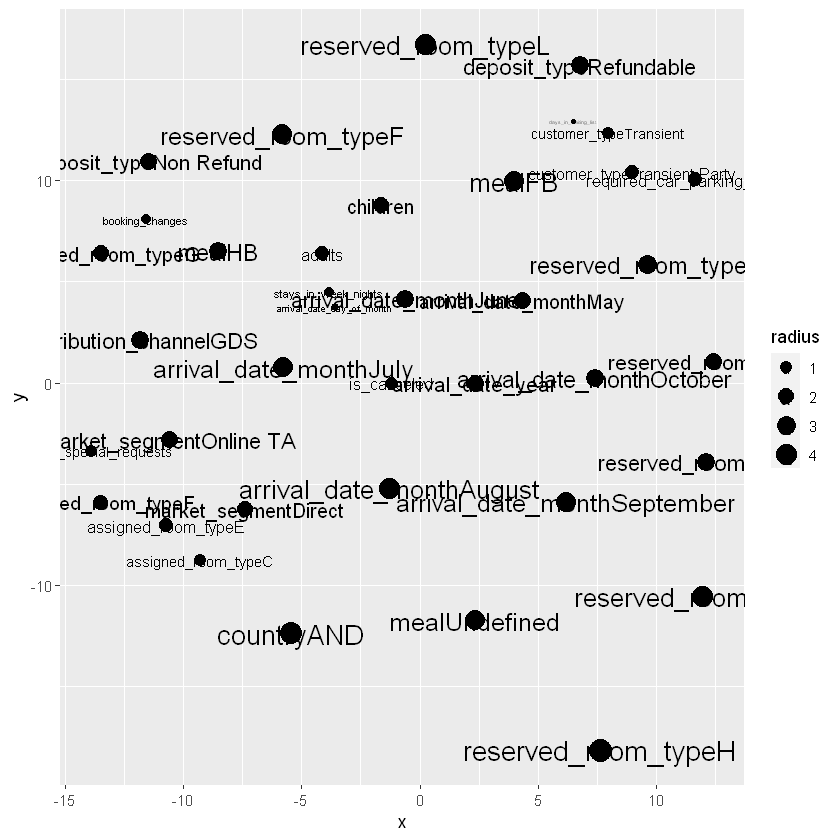

In [79]:
(
    ggplot(coefs, aes(x=x,  y=y , size=radius)) + 
    geom_point() +
    geom_text(aes(label=variable))
)